<a href="https://colab.research.google.com/github/vinayak-7569/ML-PROJECT-4/blob/main/salaryestimation_using_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
upload = files.upload()

Saving Salary.csv to Salary.csv


In [ ]:
dataset = pd.read_csv('Salary.csv')
dataset

,age,education,capital,hrs per week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
5,34,9,0,45,<=50K
6,38,6,0,40,<=50K
7,74,16,0,20,>50K
8,68,9,0,40,<=50K
9,41,10,0,60,>50K


In [ ]:
print(dataset.shape)
print(dataset.head(5))

(14, 5)
   age  education  capital  hrs per week income
0   90          9        0            40  <=50K
1   82          9        0            18  <=50K
2   66         10        0            40  <=50K
3   54          4        0            40  <=50K
4   41         10        0            40  <=50K


In [ ]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head(5))


   age  education  capital  hrs per week  income
0   90          9        0            40       0
1   82          9        0            18       0
2   66         10        0            40       0
3   54          4        0            40       0
4   41         10        0            40       0


In [ ]:
X = dataset.iloc[:, :-1].values
X


array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       [54,  4,  0, 40],
       [41, 10,  0, 40],
       [34,  9,  0, 45],
       [38,  6,  0, 40],
       [74, 16,  0, 20],
       [68,  9,  0, 40],
       [41, 10,  0, 60],
       [45, 16,  0, 35],
       [38, 15,  0, 45],
       [52, 13,  0, 20],
       [32, 14,  0, 55]])

In [ ]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.46966822, -0.28171808,  0.        ,  0.19659905],
       [-1.30463394,  0.84515425,  0.        ,  1.28881597],
       [-0.83496572, -0.28171808,  0.        ,  1.65288828],
       [ 1.30463394, -0.56343617,  0.        , -1.40531911],
       [ 0.88715108,  1.40859042,  0.        , -1.25969019],
       [-0.62622429,  1.40859042,  0.        , -0.16747326],
       [-0.15655607, -1.97202659,  0.        ,  0.19659905],
       [ 1.7221168 , -0.56343617,  0.        ,  0.19659905],
       [-1.20026322, -0.56343617,  0.        ,  0.56067135],
       [-0.26092679,  0.56343617,  0.        , -1.25969019]])

Text(0, 0.5, 'Mean Error')

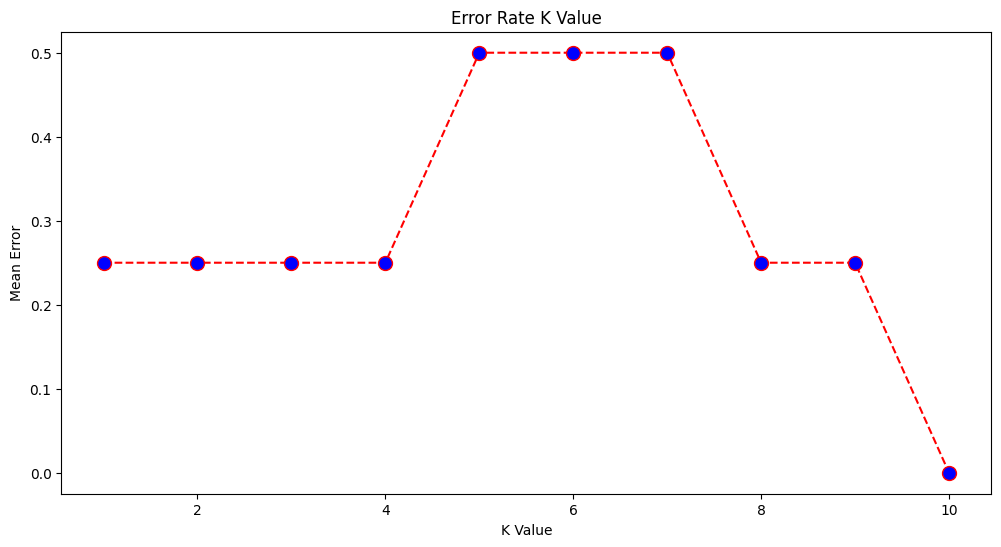

In [ ]:

error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

n_samples_train = X_train.shape[0]

# Ensure n_neighbors is less than or equal to n_samples_train
for i in range(1, min(40, n_samples_train + 1)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, min(40, n_samples_train + 1)), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3 , metric = 'minkowski' , p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
age = int(input("Enter New Employee's Age: "))
education_num = int(input("Enter New Employee's Education Num: "))
capital_gain = int(input("Enter New Employee's Capital Gain: "))
workhours = int(input("Enter New Employee's Work Hours per week: "))
newEmp = [[age, education_num, capital_gain, workhours]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might have good salary")
else:
  print("Employee might not have good salary")

Enter New Employee's Age: 30
Enter New Employee's Education Num: 11
Enter New Employee's Capital Gain: 100
Enter New Employee's Work Hours per week: 20
[1]
Employee might have good salary


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
#cm = confusion_matrix(y_test, y_pred)
#print(cm)
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred) * 100)) # Changed to format with parentheses

Accuracy of the Model: 75.0%
